# Tarea 3

## Hacer convolución de dos señales (senos) con diferentes frecuencias.

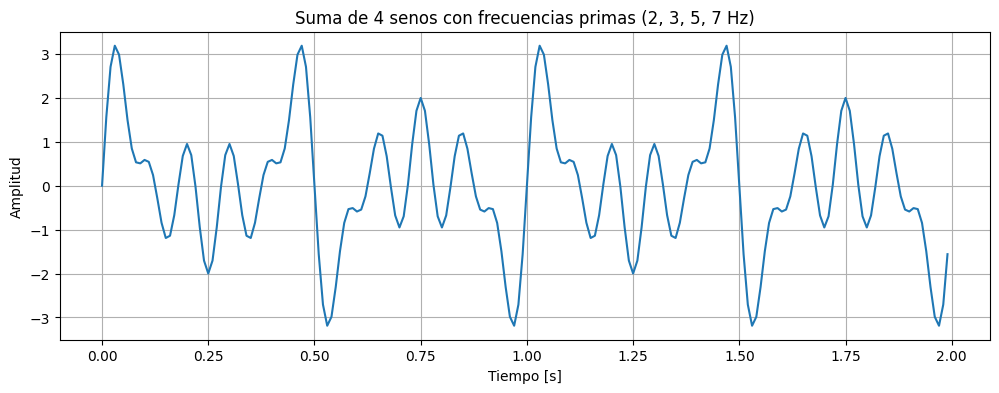

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de tiempo
fs = 100  # frecuencia de muestreo en Hz
t = np.arange(0, 2, 1/fs)  # 2 segundos de duración

# Frecuencias primos
prime_freqs = [ 3, 5, 7, 11]

# Generar señal sumando senos con las frecuencias primos
signal = np.zeros_like(t)
for f in prime_freqs:
    signal += np.sin(2 * np.pi * f * t)

# Graficar la señal resultante
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title('Suma de 4 senos con frecuencias primas (2, 3, 5, 7 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


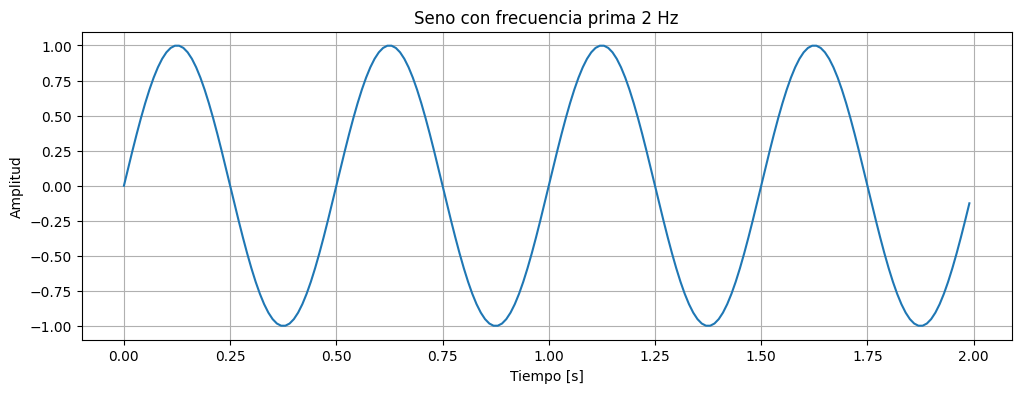

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de tiempo
fs = 100  # frecuencia de muestreo en Hz
t = np.arange(0, 2, 1/fs)  # 2 segundos de duración

# Frecuencia primo diferente a las anteriores
prime_freq_single = 2

# Generar señal seno con la frecuencia seleccionada
signal_single = np.sin(2 * np.pi * prime_freq_single * t)

# Graficar la señal resultante
plt.figure(figsize=(12, 4))
plt.plot(t, signal_single)
plt.title(f'Seno con frecuencia prima {prime_freq_single} Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


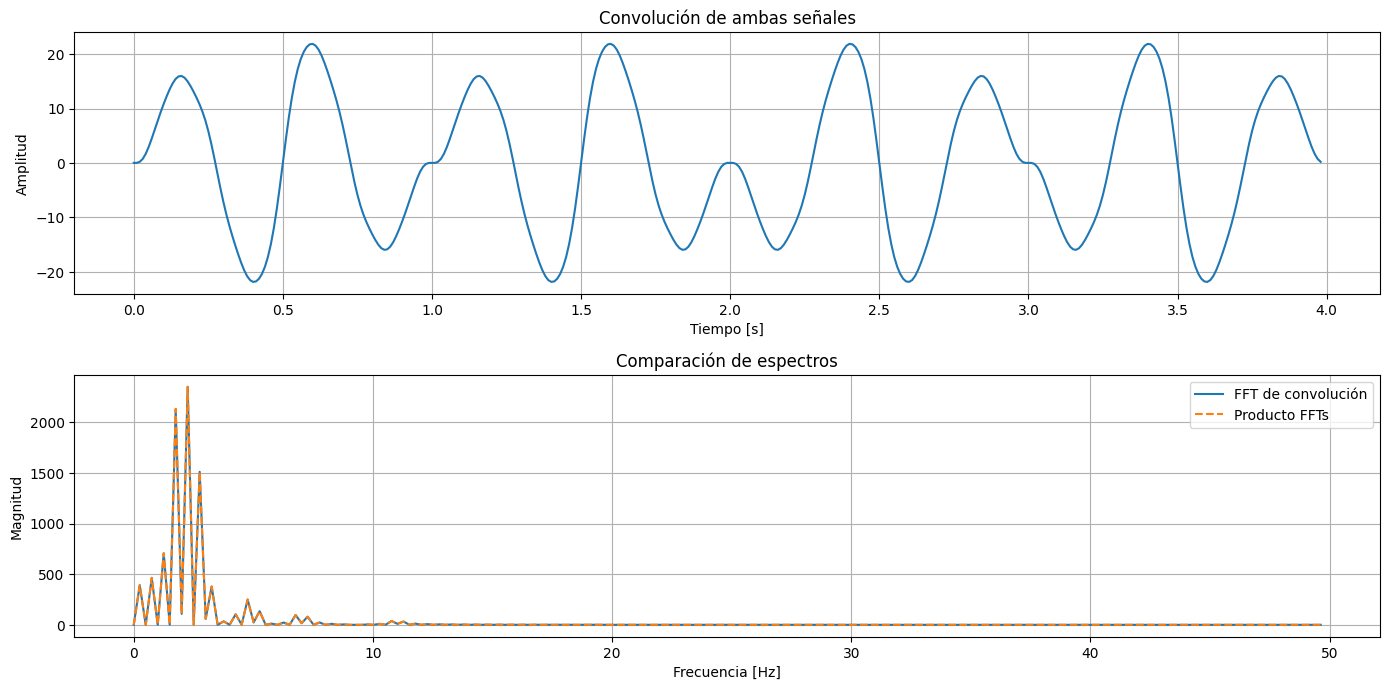

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de tiempo
fs = 100  # frecuencia de muestreo en Hz
t = np.arange(0, 2, 1/fs)  # 2 segundos de duración

# Frecuencias primos para la señal múltiple
prime_freqs = [ 3, 5, 7, 11]

# Señal suma de 4 senos
signal_multi = np.zeros_like(t)
for f in prime_freqs:
    signal_multi += np.sin(2 * np.pi * f * t)

# Señal seno 
prime_freq_single = 2
signal_single = np.sin(2 * np.pi * prime_freq_single * t)

# Convolución de ambas señales
conv_signal = np.convolve(signal_multi, signal_single, mode='full')

# Tiempo para la señal convolucionada
t_conv = np.arange(0, len(conv_signal)) / fs

# FFT de las señales 
N = len(conv_signal)
FFT_multi = np.fft.fft(signal_multi, n=N)
FFT_single = np.fft.fft(signal_single, n=N)
FFT_conv = np.fft.fft(conv_signal)

# Producto de FFTs 
FFT_product = FFT_multi * FFT_single

# Frecuencia para el eje x
freqs = np.fft.fftfreq(N, d=1/fs)

# Graficar señales y resultado
plt.figure(figsize=(14, 10))


plt.subplot(3,1,1)
plt.plot(t_conv, conv_signal)
plt.title('Convolución de ambas señales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(freqs[:N//2], np.abs(FFT_conv)[:N//2], label='FFT de convolución')
plt.plot(freqs[:N//2], np.abs(FFT_product)[:N//2], linestyle='dashed', label='Producto FFTs')
plt.title('Comparación de espectros')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
